In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import copy

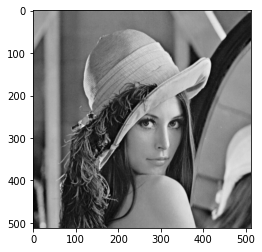

In [4]:
gray_image=cv.imread('lenna.png',0)
plt.imshow(gray_image,cmap='gray')

In [16]:
# implement the formula of a circle
def ideal_low_pass(fft,radius):
    temp=copy.copy(fft)
    center=(round(temp.shape[0]/2),round(temp.shape[1]/2))
    for u, rows in enumerate(temp):
        for v, cols in enumerate(rows):
            dist=math.sqrt((u-center[0])**2 + (v-center[1])**2)
            if dist>radius:
                temp[u,v]=0
    return temp

In [17]:
fft=np.fft.fftshift(np.fft.fft2(gray_image))

# ideal low pass filter
fft_1=ideal_low_pass(fft,25)
fft_2=ideal_low_pass(fft,50)
fft_3=ideal_low_pass(fft,150)
# plt.imshow(np.log(abs(fft_1)),cmap='gray')

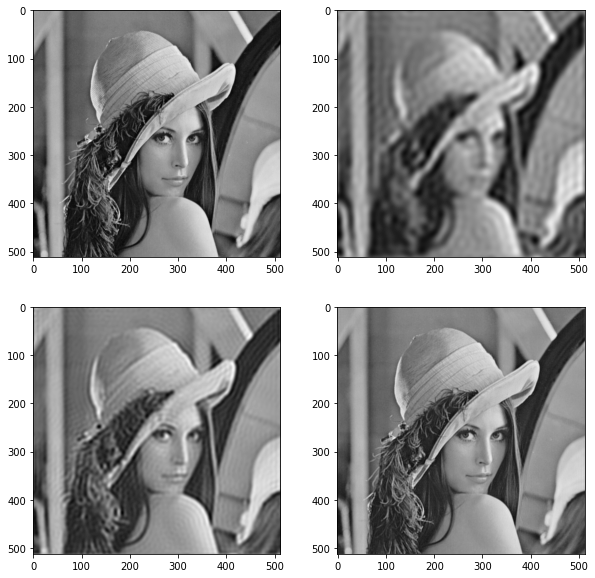

In [18]:
ifft_1=np.fft.ifft2(fft_1)
ifft_2=np.fft.ifft2(fft_2)
ifft_3=np.fft.ifft2(fft_3)

fig,ax=plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(abs(ifft_1),cmap='gray')
plt.subplot(2,2,3)
plt.imshow(abs(ifft_2),cmap='gray')
plt.subplot(2,2,4)
plt.imshow(abs(ifft_3),cmap='gray')

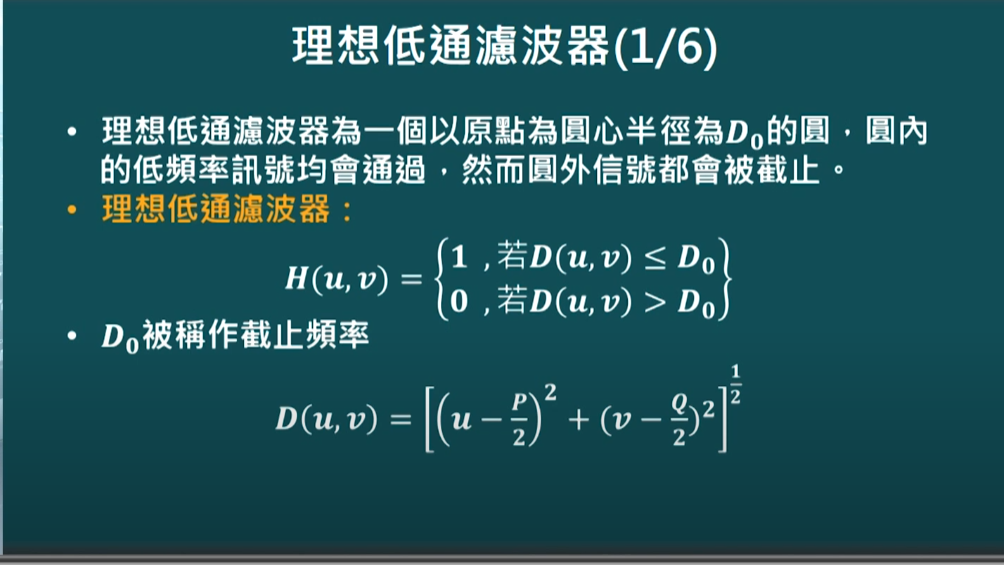